In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])

In [3]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)
        
    def forward(self,x):
        y_=self.linear(x)
        return y_

In [7]:
model=LinearModel()
criterion=torch.nn.MSELoss(size_average=False)
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [13]:
w_list=[]
loss_list=[]
for epoch in range(100):
    y_=model(x_data)
    loss=criterion(y_,y_data)
    print(epoch,loss.data.item())
    loss_list.append(loss.data.item())
    optimizer.zero_grad()
    loss.backward()
    w_list.append(model.linear.weight.item())
    optimizer.step()

0 0.0023374748416244984
1 0.0023039006628096104
2 0.002270799595862627
3 0.0022381413727998734
4 0.0022060065530240536
5 0.0021742857061326504
6 0.0021430368069559336
7 0.0021122279576957226
8 0.002081888960674405
9 0.002051943214610219
10 0.0020224861800670624
11 0.0019934135489165783
12 0.001964773051440716
13 0.0019365240586921573
14 0.0019086700631305575
15 0.0018812776543200016
16 0.0018542460165917873
17 0.001827561529353261
18 0.0018013222143054008
19 0.0017754097934812307
20 0.0017499260138720274
21 0.0017247518990188837
22 0.0016999640502035618
23 0.0016755411634221673
24 0.0016514604212716222
25 0.001627722755074501
26 0.0016043412033468485
27 0.0015812765341252089
28 0.0015585373621433973
29 0.0015361611731350422
30 0.0015140665927901864
31 0.001492322888225317
32 0.0014708659145981073
33 0.0014497238444164395
34 0.0014288753736764193
35 0.0014083698624745011
36 0.0013881034683436155
37 0.00136815186124295
38 0.0013485070085152984
39 0.001329114311374724
40 0.001310032559558

In [28]:
y_test=model(torch.Tensor([[4]]))
display(y_test.data.item())
display(y_test.grad_fn)
y_test

7.972854137420654

tensor([[7.9729]], grad_fn=<AddmmBackward>)

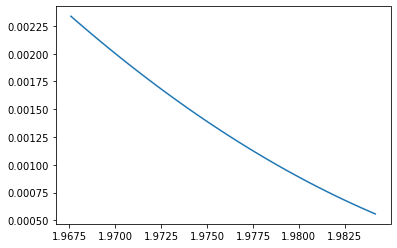

In [29]:
plt.plot(w_list,loss_list)